<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/SatelliteImagery/DataProcessing/Spacenet_Raster_Image_Labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio rioxarray

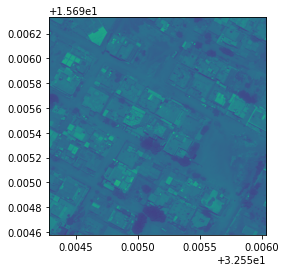

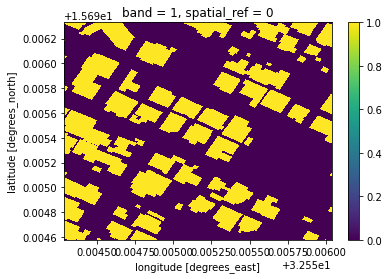

In [ ]:
import json,rioxarray,rasterio
from rasterio.plot import show
def applyLabels(raster_img,geojson):
  # load in the geojson file
  with open(geojson) as igj:
      data = json.load(igj)
  crs = data["crs"]["properties"]["name"]
  geoms = [feat["geometry"] for feat in data["features"]]
  # create empty mask raster based on the input raster
  rds = rioxarray.open_rasterio(raster_img).isel(band=0)
  rds.values[:] = 1
  rds.rio.write_nodata(0, inplace=True)
  # clip the raster to the mask
  clipped = rds.rio.clip(geoms, crs, drop=False)
  return clipped
raster = '/content/drive/Shareddrives/DATA298A/Satelite_Dataset/Spacenet2/Khartoum/PS-RGB/SN2_buildings_train_AOI_5_Khartoum_PS-RGB_img1044.tif'
geojson = '/content/drive/Shareddrives/DATA298A/Satelite_Dataset/Spacenet2/Khartoum/geojson_buildings/SN2_buildings_train_AOI_5_Khartoum_geojson_buildings_img1044.geojson'

raster_src = rasterio.open(raster)
show(raster_src)
clipped_raster = applyLabels(raster,geojson)
clipped_raster.plot()